<a href="https://colab.research.google.com/github/oduoranto/Machine-Learning/blob/main/CarPricePrediction_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing the necessary libraries


In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pickle

In [38]:
#loadiing the data from csv to pandas dataframe
car_data = pd.read_csv('/content/car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [39]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [40]:
#Getting some info about the dataframe
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [41]:
car_data.shape

(301, 9)

In [42]:
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [43]:
#Checking the distribution of categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the categorical data

In [44]:
car_data.replace({'Fuel_Type':{'Petrol': 0, 'Diesel': 1, 'CNG': 3}}, inplace=True)
car_data.replace({'Seller_Type':{'Dealer': 0, 'Individual': 1}}, inplace=True)
car_data.replace({'Transmission':{'Manual': 0, 'Automatic': 1}}, inplace=True)


<ipython-input-44-9324e9433928>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol': 0, 'Diesel': 1, 'CNG': 3}}, inplace=True)
<ipython-input-44-9324e9433928>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Seller_Type':{'Dealer': 0, 'Individual': 1}}, inplace=True)
<ipython-input-44-9324e9433928>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fa

In [45]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into Training and testing data

In [46]:
X = car_data.drop(['Car_Name', 'Selling_Price'],axis=1)
Y = car_data['Selling_Price']


In [47]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [48]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)

Model training using linear regression

In [50]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [51]:
training_data_prediction = linear_regression_model.predict(X_train)

In [52]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("The error score is : ", error_score)


The error score is :  0.8777735182846064


Visulaizing the results vs the actual prices

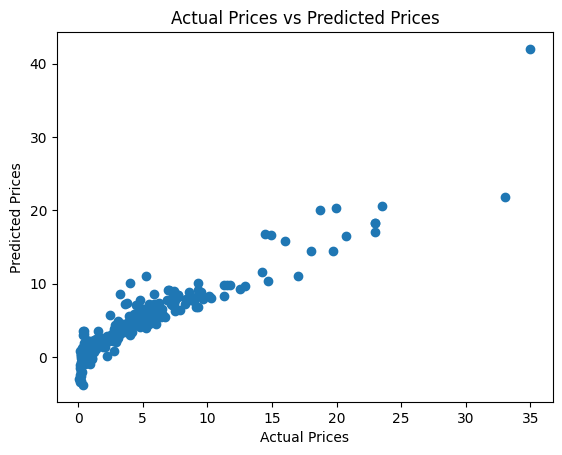

In [53]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [54]:
#Predictinng on test data
test_data_prediction = linear_regression_model.predict(X_test)

In [55]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("The error score is : ", error_score)

The error score is :  0.8162925313688285


Model training using lasso regression

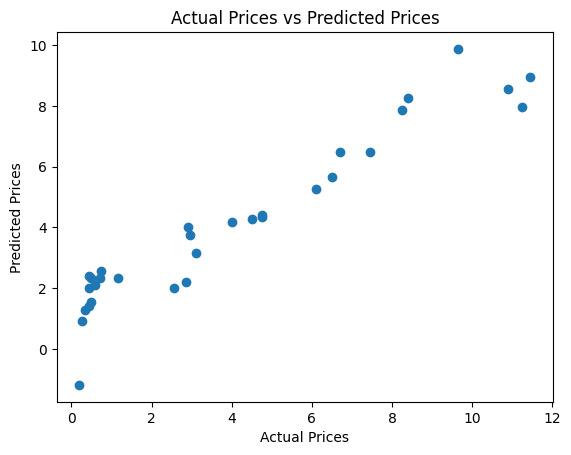

In [66]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [61]:
lasso_regression_model = Lasso()
lasso_regression_model.fit(X_train, Y_train)

Lasso()

In [60]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("The error score is : ", error_score)


The error score is :  0.8777735182846064


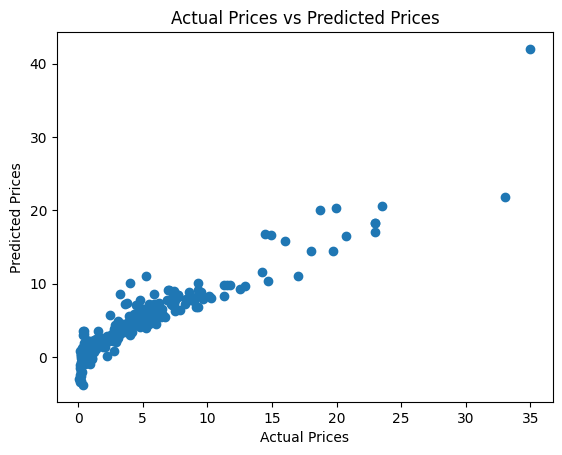

In [62]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [64]:
test_data_prediction = lasso_regression_model.predict(X_test)

In [65]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("The error score is : ", error_score)

The error score is :  0.8709167941173195


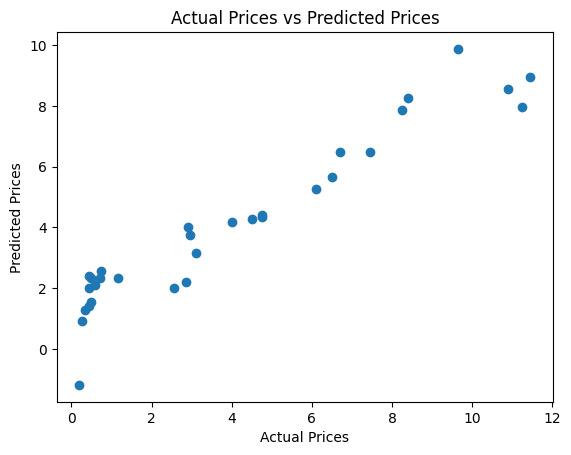

In [67]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [73]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [79]:
new_data = pd.DataFrame({
    'Year':[2014],
    'Present_Price':[5.59],
    'Kms_Driven':[27000],
    'Fuel_Type':[0],
    'Seller_Type':[0],
    'Transmission':[0],
    'Owner':[0]

})

prediction = lasso_regression_model.predict(new_data)
print('The price = ', prediction)

The price =  [3.8257306]


Saving the trained model

In [80]:
filename = 'trained_model.sav'
pickle.dump(lasso_regression_model, open(filename, 'wb'))

Loading our model

In [81]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))